# Introduction and Processing of the Data

> **TODO:** several paragraphs indicating:
> - What is the work about?
> - Why is it interesting?
> - Business volume of the domain
> - Local/national importance and relevance in the current context
>
> It's important to provide a solid justification for the interest in the domain and link to relevant sites as well as references.

In this project we will treat with data of various nature related to countries in the year 2023 including but not limited to health, economic, enviromental and educational indicators. The main objective is to explore how these different indicators relate and influence each other in various ways, some of which may seem obvious although having data to back our intuitions is needed to confidently make any statement.

We found this topic interesting due to several factors, but it mainly comes down to three main statements:
- People, including us, have many opinions on how some factors influence others when it comes to quality of life (e.g. Better education leads to better economy) but most of these are based on what we have discussed with others and intuition, thus our opinions are not directly based on irrefutable facts. While many of these beliefs may show to be accurate, we wish to do our best to confirm or refute many of these beliefs based on the data at hand
- In the same manner, we believe that having evidence and data to back evidences up are a great tool against facts manipulation, which it's common in many places in the world.
- From the point of view of developing our skills we believe this dataset lends itself very well to outsourcing information and incorporating new sources of data to the selected dataset which may help answer some questions in a better way. 

Moreover, this is a valuable opportunity to understand the sheer scale of data available and the insights that can be derived from it. The global volume of data concerning economic, educational, health, and environmental indicators is immense, with organizations and governments continuously collecting, analyzing, and reporting new statistics. By exploring connections within this data, we can uncover patterns that may not be immediately apparent, providing a more comprehensive understanding of how different factors interact. This analytical approach allows for evidence-based decision-making, reducing reliance on assumptions and leading to more informed discussions on policies, development strategies, and quality-of-life improvements.

In the context of Spain in 2025, analyzing data across economic, educational, health, and environmental indicators is crucial for informed decision-making and policy development. Spain has demonstrated significant economic resilience, with a GDP growth of 3.2% in 2024, surpassing the eurozone average, and a projected growth of 2.6% in 2025. This positive trajectory is attributed to innovative policies, investments in renewable energy, and a revitalized labor market [[1]](https://elpais.com/economia/2025-02-09/la-economia-espanola-sorprende-al-mundo-de-oveja-negra-a-motor-europeo.html)

However, challenges persist, including high unemployment rates and environmental vulnerabilities. The devastating floods in Valencia in October 2024, which resulted in over 220 fatalities, underscored the need for enhanced climate resilience and infrastructure investment.[[2]](https://www.reuters.com/sustainability/sustainable-finance-reporting/valencia-floods-prompt-race-funds-boost-spains-climate-resilience-2025-02-06)

By examining the interplay between these indicators, stakeholders can develop strategies to bolster economic growth, improve educational outcomes, enhance public health, and strengthen environmental sustainability. This comprehensive analysis is essential for addressing current challenges and ensuring long-term prosperity in Spain.

### Dataset Description

> **TODO:** dataset description indicating:
> - Size in KB/MB/GB
> - Number of rows and columns
> - Where the dataset was sourced from
> - Types of data and specific meanings of the really important columns.

As we incorporate other sources apart from the original dataset we started this, we will define the original dataset here and define the rest as they are included and used.

**Size of original dataset:** 49210 Bytes

**Dimensions:** 195 rows (countries) x 35 columns (indicators)

**Source:** [kagglee](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)

**Columns:** 

- **Geographical Indicators:**
    - **Country:** Name of the country.
    - **Abbreviation:** Abbreviation or code representing the country.
    - **Land Area (Km2):** Total land area of the country in square kilometers.
    - **Latitude:** Latitude coordinate of the country's location.
    - **Longitude:** Longitude coordinate of the country's location.

- **Demographic Indicators:**
    - **Population:** Total population of the country.
    - **Density (P/Km2):** Population density measured in persons per square kilometer.
    - **Birth Rate:** Number of births per 1,000 population per year.
    - **Fertility Rate:** Average number of children born to a woman during her lifetime.
    - **Infant Mortality:** Number of deaths per 1,000 live births before reaching one year of age.
    - **Life Expectancy:** Average number of years a newborn is expected to live.
    - **Urban Population:** Percentage of the population living in urban areas.

- **Economic Indicators:**
    - **GDP:** Gross Domestic Product, the total value of goods and services produced in the country.
    - **CPI:** Consumer Price Index, a measure of inflation and purchasing power.
    - **CPI Change (%):** Percentage change in the Consumer Price Index compared to the previous year.
    - **Minimum Wage:** Minimum wage level in local currency.
    - **Tax Revenue (%):** Tax revenue as a percentage of GDP.
    - **Total Tax Rate:** Overall tax burden as a percentage of commercial profits.
    - **Unemployment Rate:** Percentage of the labor force that is unemployed.
    - **Gasoline_Price:** Price of gasoline per liter in local currency.
    - **Labor Force Participation (%):** Percentage of the population that is part of the labor force.

- **Health Indicators:**
    - **CO2 Emissions:** Carbon dioxide emissions in tons.
    - **Out of Pocket Health Expenditure (%):** Percentage of total health expenditure paid out-of-pocket by individuals.
    - **Physicians per Thousand:** Number of physicians per thousand people.
    - **Maternal Mortality Ratio:** Number of maternal deaths per 100,000 live births.

- **Education Indicators:**
    - **Gross Primary Education Enrollment (%):** Gross enrollment ratio for primary education.
    - **Gross Tertiary Education Enrollment (%):** Gross enrollment ratio for tertiary education.

- **Miscellaneous Indicators:**
    - **Agricultural Land (%):** Percentage of land area used for agricultural purposes.
    - **Forested Area (%):** Percentage of land area covered by forests.
    - **Armed Forces Size:** Size of the armed forces in the country.
    - **Calling Code:** International calling code for the country.
    - **Capital/Major City:** Name of the capital or major city.
    - **Currency_Code:** Currency code used in the country.
    - **Largest City:** Name of the country's largest city.
    - **Official Language:** Official language(s) spoken in the country.

### Data Processing

> **TODO:** describe the details, problems, and transformations applied when importing and cleaning the dataset.

First, we will import the necessary libraries.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from PyPDF2 import PdfReader

# Types
from polars.dataframe.frame import DataFrame
from typing import Any
from matplotlib.axes import Axes

Now, we will load the dataset, fix some column names and display the first few rows and its types to understand the structure of the data.

In [2]:
raw_df: DataFrame = pl.read_csv(
    source="../data/raw/world-data-2023.csv", ignore_errors=True
)
raw_df.head()

Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
str,str,str,str,str,str,f64,i64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,i64,str,str,str,f64,str,str,str,str,str,str,f64,f64
"""Afghanistan""","""60""","""AF""","""58.10%""","""652,230""","""323,000""",32.49,93,"""Kabul""","""8,672""",149.9,"""2.30%""","""AFN""",4.47,"""2.10%""","""$0.70 ""","""$19,101,353,833 ""","""104.00%""","""9.70%""",47.9,"""Kabul""",64.5,638,"""$0.43 ""","""Pashto""","""78.40%""",0.28,"""38,041,754""","""48.90%""","""9.30%""","""71.40%""","""11.12%""","""9,797,273""",33.93911,67.709953
"""Albania""","""105""","""AL""","""43.10%""","""28,748""","""9,000""",11.78,355,"""Tirana""","""4,536""",119.05,"""1.40%""","""ALL""",1.62,"""28.10%""","""$1.36 ""","""$15,278,077,447 ""","""107.00%""","""55.00%""",7.8,"""Tirana""",78.5,15,"""$1.12 ""","""Albanian""","""56.90%""",1.2,"""2,854,191""","""55.70%""","""18.60%""","""36.60%""","""12.33%""","""1,747,593""",41.153332,20.168331
"""Algeria""","""18""","""DZ""","""17.40%""","""2,381,741""","""317,000""",24.28,213,"""Algiers""","""150,006""",151.36,"""2.00%""","""DZD""",3.02,"""0.80%""","""$0.28 ""","""$169,988,236,398 ""","""109.90%""","""51.40%""",20.1,"""Algiers""",76.7,112,"""$0.95 ""","""Arabic""","""28.10%""",1.72,"""43,053,054""","""41.20%""","""37.20%""","""66.10%""","""11.70%""","""31,510,100""",28.033886,1.659626
"""Andorra""","""164""","""AD""","""40.00%""","""468""",null,7.2,376,"""Andorra la Vella""","""469""",null,null,"""EUR""",1.27,"""34.00%""","""$1.51 ""","""$3,154,057,987 ""","""106.40%""",null,2.7,"""Andorra la Vella""",null,null,"""$6.63 ""","""Catalan""","""36.40%""",3.33,"""77,142""",null,null,null,null,"""67,873""",42.506285,1.521801
"""Angola""","""26""","""AO""","""47.50%""","""1,246,700""","""117,000""",40.73,244,"""Luanda""","""34,693""",261.73,"""17.10%""","""AOA""",5.52,"""46.30%""","""$0.97 ""","""$94,635,415,870 ""","""113.50%""","""9.30%""",51.6,"""Luanda""",60.8,241,"""$0.71 ""","""Portuguese""","""33.40%""",0.21,"""31,825,295""","""77.50%""","""9.20%""","""49.10%""","""6.89%""","""21,061,025""",-11.202692,17.873887


We observe some inconsistancies in column naming, so we will rename some columns to make them more readable and consistent.

In [3]:
# Fix some column names

raw_df: DataFrame = raw_df.rename(mapping={"Density\r\n(P/Km2)": "Density(P/Km2)"})
raw_df = raw_df.rename(mapping={"Agricultural Land( %)": "Agricultural Land(%)"})
raw_df = raw_df.rename(mapping={"Urban_population": "Urban population"})

# Display first 5 rows and column types
raw_df.head(5)

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,str,str,str,str,str,f64,i64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,f64,i64,str,str,str,f64,str,str,str,str,str,str,f64,f64
"""Afghanistan""","""60""","""AF""","""58.10%""","""652,230""","""323,000""",32.49,93,"""Kabul""","""8,672""",149.9,"""2.30%""","""AFN""",4.47,"""2.10%""","""$0.70 ""","""$19,101,353,833 ""","""104.00%""","""9.70%""",47.9,"""Kabul""",64.5,638,"""$0.43 ""","""Pashto""","""78.40%""",0.28,"""38,041,754""","""48.90%""","""9.30%""","""71.40%""","""11.12%""","""9,797,273""",33.93911,67.709953
"""Albania""","""105""","""AL""","""43.10%""","""28,748""","""9,000""",11.78,355,"""Tirana""","""4,536""",119.05,"""1.40%""","""ALL""",1.62,"""28.10%""","""$1.36 ""","""$15,278,077,447 ""","""107.00%""","""55.00%""",7.8,"""Tirana""",78.5,15,"""$1.12 ""","""Albanian""","""56.90%""",1.2,"""2,854,191""","""55.70%""","""18.60%""","""36.60%""","""12.33%""","""1,747,593""",41.153332,20.168331
"""Algeria""","""18""","""DZ""","""17.40%""","""2,381,741""","""317,000""",24.28,213,"""Algiers""","""150,006""",151.36,"""2.00%""","""DZD""",3.02,"""0.80%""","""$0.28 ""","""$169,988,236,398 ""","""109.90%""","""51.40%""",20.1,"""Algiers""",76.7,112,"""$0.95 ""","""Arabic""","""28.10%""",1.72,"""43,053,054""","""41.20%""","""37.20%""","""66.10%""","""11.70%""","""31,510,100""",28.033886,1.659626
"""Andorra""","""164""","""AD""","""40.00%""","""468""",null,7.2,376,"""Andorra la Vella""","""469""",null,null,"""EUR""",1.27,"""34.00%""","""$1.51 ""","""$3,154,057,987 ""","""106.40%""",null,2.7,"""Andorra la Vella""",null,null,"""$6.63 ""","""Catalan""","""36.40%""",3.33,"""77,142""",null,null,null,null,"""67,873""",42.506285,1.521801
"""Angola""","""26""","""AO""","""47.50%""","""1,246,700""","""117,000""",40.73,244,"""Luanda""","""34,693""",261.73,"""17.10%""","""AOA""",5.52,"""46.30%""","""$0.97 ""","""$94,635,415,870 ""","""113.50%""","""9.30%""",51.6,"""Luanda""",60.8,241,"""$0.71 ""","""Portuguese""","""33.40%""",0.21,"""31,825,295""","""77.50%""","""9.20%""","""49.10%""","""6.89%""","""21,061,025""",-11.202692,17.873887


We observed that some of the columns are not in the correct data type. We will convert them to the correct data type.

Certain columns contain numerical values formatted as strings with commas (`,`) as thousand separators. These need to be cleaned and converted into integers. These columns include:
- `Density(P/Km2)`
- `Land Area(Km2)`
- `Armed Forces size`
- `Co2-Emissions`
- `Population`
- `Urban population`

Some columns contain monetary values formatted as strings with dollar signs (`$`) and commas (`,`) as thousand separators. These need to be cleaned and converted into floats. These columns include:
- `Gasoline Price`
- `GDP`
- `Minimum wage`

Some columns contain percentages formatted as strings with percentage signs (`%`). These need to be cleaned and converted into floats. These columns include:
- `Agricultural Land(%)`
- `CPI Change (%)`
- `Forested Area (%)`
- `Gross primary education enrollment (%)`
- `Gross tertiary education enrollment (%)`
- `Out of pocket health expenditure`
- `Population: Labor force participation (%)`
- `Tax revenue (%)`
- `Total tax rate`
- `Unemployment rate`

In [4]:
data: DataFrame = raw_df.clone()

# Columns that should be integers
int_columns: list[str] = [
    "Density(P/Km2)",
    "Land Area(Km2)",
    "Armed Forces size",
    "Co2-Emissions",
    "Population",
    "Urban population",
]
data = data.with_columns(
    [
        pl.col(name=col)
        .str.strip_chars()
        .str.replace_all(pattern=",", value="")
        .cast(dtype=pl.Int64)
        for col in int_columns
    ]
)

# Currency columns that should be floats
float_columns_currency: list[str] = ["Gasoline Price", "GDP", "Minimum wage"]
data = data.with_columns(
    [
        pl.col(name=col)
        .str.strip_chars()
        .str.replace_all(pattern=r"[\$,]", value="")
        .cast(dtype=pl.Float64)
        for col in float_columns_currency
    ]
)

# Percentage columns that should be floats
float_columns_percentage: list[str] = [
    "Agricultural Land(%)",
    "CPI Change (%)",
    "Forested Area (%)",
    "Gross primary education enrollment (%)",
    "Gross tertiary education enrollment (%)",
    "Out of pocket health expenditure",
    "Population: Labor force participation (%)",
    "Tax revenue (%)",
    "Total tax rate",
    "Unemployment rate",
]
data = data.with_columns(
    [
        pl.col(name=col)
        .str.strip_chars()
        .str.replace_all(pattern="%", value="")
        .cast(dtype=pl.Float64)
        for col in float_columns_percentage
    ]
)

data.head(n=5)

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,str,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,str,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Afghanistan""",60,"""AF""",58.1,652230,323000,32.49,93,"""Kabul""",8672,149.9,2.3,"""AFN""",4.47,2.1,0.7,1.9101e10,104.0,9.7,47.9,"""Kabul""",64.5,638,0.43,"""Pashto""",78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.93911,67.709953
"""Albania""",105,"""AL""",43.1,28748,9000,11.78,355,"""Tirana""",4536,119.05,1.4,"""ALL""",1.62,28.1,1.36,1.5278e10,107.0,55.0,7.8,"""Tirana""",78.5,15,1.12,"""Albanian""",56.9,1.2,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331
"""Algeria""",18,"""DZ""",17.4,2381741,317000,24.28,213,"""Algiers""",150006,151.36,2.0,"""DZD""",3.02,0.8,0.28,1.6999e11,109.9,51.4,20.1,"""Algiers""",76.7,112,0.95,"""Arabic""",28.1,1.72,43053054,41.2,37.2,66.1,11.7,31510100,28.033886,1.659626
"""Andorra""",164,"""AD""",40.0,468,null,7.2,376,"""Andorra la Vella""",469,null,null,"""EUR""",1.27,34.0,1.51,3.1541e9,106.4,null,2.7,"""Andorra la Vella""",null,null,6.63,"""Catalan""",36.4,3.33,77142,null,null,null,null,67873,42.506285,1.521801
"""Angola""",26,"""AO""",47.5,1246700,117000,40.73,244,"""Luanda""",34693,261.73,17.1,"""AOA""",5.52,46.3,0.97,9.4635e10,113.5,9.3,51.6,"""Luanda""",60.8,241,0.71,"""Portuguese""",33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887


While exploring the data, we noticed that two rows did not have almost any information on any of the column. As these columns could add noise on further analysis and an effort to fin most of this information on our own resulted in no success, we decided that these rows, corresponding to Palestine and Vatican City countries will be removed from the dataset.

In [5]:
# Show Palestine and Vatican City rows
empty_rows: DataFrame = data.filter(
    pl.col(name="Country").is_in(
        other=["Palestinian National Authority", "Vatican City"]
    )
)
empty_rows

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,str,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,str,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Vatican City""",2003,null,null,0,null,null,379,"""Vatican City""",null,null,null,"""EUR""",null,null,null,null,null,null,null,null,null,null,null,"""Italian""",null,null,836,null,null,null,null,null,41.902916,12.453389
"""Palestinian National Authority""",847,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Arabic""",null,null,null,null,null,null,null,null,31.952162,35.233154


In [6]:
# Remove rows that are completely empty
data: DataFrame = data.filter(
    ~pl.col(name="Country").is_in(
        other=["Palestinian National Authority", "Vatican City"]
    )
)

Same as with the previous rows, we believe that some columns may not include any valuable information for our analysis. We can analyse the different cases:

- **Calling Code, Capital/Major City, Largest City, Official language:** These columns do not add any valuable information as they are country-specific and do not provide any insights for our analysis. We will drop them.
- **CPI change:** This column does not provide any valuable information for our analysis because we do not want to analyze the evolution of the Consumer Price Index. We will drop it and keep the `CPI` column.
- **Abbreviation, Latitude, Longitude:** These columns are not necessary for our analysis, but we will keep them for visualization purposes.
- **Minimum wage currency:** This column being kept would depend on the questions we want to answer and the feasability to find and fill the missing data. We will keep it for now.

Note that those column with all values being unique are included above.

In [7]:
columns_to_drop: list[str] = [
    "Calling Code",
    "Capital/Major City",
    "Largest City",
    "Official language",
    "CPI change",
]

columns_to_keep: list[str] = [col for col in data.columns if col not in columns_to_drop]

cleaned_df: DataFrame = data.select(columns_to_keep)

We observed that there was a country name with some special characters. Thanks to the `Abbriviation` column, we identified that the country is Sao Tome and Principe. We will replace the special characters with the correct ones.

In [8]:
# Show special characters in the Country column
special_chars: DataFrame = cleaned_df.filter(pl.col("Country").str.contains("�"))
special_chars

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""S�����������""",228,"""ST""",50.7,964,1000,31.54,121,185.09,7.9,"""STN""",4.32,55.8,null,4.29016605e8,106.8,13.4,24.4,"""S����""",70.2,130,null,11.7,0.05,215056,57.8,14.6,37.0,13.37,158277,null,null


In [9]:
# Replace the row with the symbol with its corresponding country
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(pl.col(name="Country").str.contains(pattern="�"))
    .then(statement=pl.lit(value="Sao Tome and Principe"))
    .otherwise(statement=pl.col(name="Country"))
    .alias(name="Country")
)
cleaned_df.filter(pl.col("Country").str.contains("Sao"))

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Sao Tome and Principe""",228,"""ST""",50.7,964,1000,31.54,121,185.09,7.9,"""STN""",4.32,55.8,null,4.29016605e8,106.8,13.4,24.4,"""S����""",70.2,130,null,11.7,0.05,215056,57.8,14.6,37.0,13.37,158277,null,null


We also noticed that some abbreviations did not follow the ISO 3166-1 alpha-2 standard, while others were null. We will replace them with the correct ones, using a PDF file that contains the correct abbreviations.

An example is Republic of Ireland, which has a null abbreviation.

In [10]:
# Show Republic of Ireland row
country_row: DataFrame = cleaned_df.filter(
    pl.col(name="Country") == "Republic of Ireland"
)
country_row

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Republic of Ireland""",72,null,64.5,70273,9000,12.5,37711,106.58,0.9,"""EUR""",1.75,11.0,1.37,3.8870e11,100.9,77.8,3.1,"""Connacht""",82.3,5,10.79,15.2,3.31,5007069,62.1,18.3,26.1,4.93,3133123,53.41291,-8.24389


In [11]:
# Get the correct ISO code abbreviations for each country
isoCodes = PdfReader(stream="../data/raw/CountryCodesISO2.pdf")
text: list[str] = []
for page in isoCodes.pages:
    page_text: str = page.extract_text()
    lines: list[str] = page_text.splitlines()
    # Skip any empty lines and the 'Country Codes ISO2' title
    filtered_lines: list[str] = [
        line for line in lines if line.strip() and "Country Codes ISO2" not in line
    ]
    text.extend(filtered_lines)

country_code: dict[str, str] = {}
for line in text:
    parts: list[str] = line.strip().split(maxsplit=1)
    if len(parts) == 2 and len(parts[0]) == 2 and parts[0].isalpha():
        code, country = parts
        country_code[country.split(sep=" (")[0]] = code.upper()


def get_country_code(country) -> str:
    return country_code.get(country)


# Create a new corrected column
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(
        (pl.col(name="Abbreviation").is_null()) | (pl.col(name="Abbreviation") == "")
    )
    .then(
        statement=pl.col(name="Country").map_elements(
            function=get_country_code, return_dtype=pl.Utf8
        )
    )
    .otherwise(statement=pl.col(name="Abbreviation"))
    .alias(name="Abbreviation")
)

Now, we can verify that the abbreviations have been corrected.

In [12]:
# Show Republic of Ireland row
country_row = cleaned_df.filter(pl.col("Country") == "Republic of Ireland")
country_row

Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
str,i64,str,f64,i64,i64,f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64
"""Republic of Ireland""",72,"""IE""",64.5,70273,9000,12.5,37711,106.58,0.9,"""EUR""",1.75,11.0,1.37,3.8870e11,100.9,77.8,3.1,"""Connacht""",82.3,5,10.79,15.2,3.31,5007069,62.1,18.3,26.1,4.93,3133123,53.41291,-8.24389


And that there are no nulls or empty strings in the `Abbreviation` column.

In [13]:
len(
    cleaned_df.filter(
        (pl.col("Abbreviation").is_null()) | (pl.col("Abbreviation") == "")
    ).rows()
)

0

### Null Values

We will check for null values in the dataset and display the columns with null values.

We will then go and fix as many columns as we can by filling the missing values by outsourcing the data we can find.

Now, we are going to display the percentage of missing values in each column.

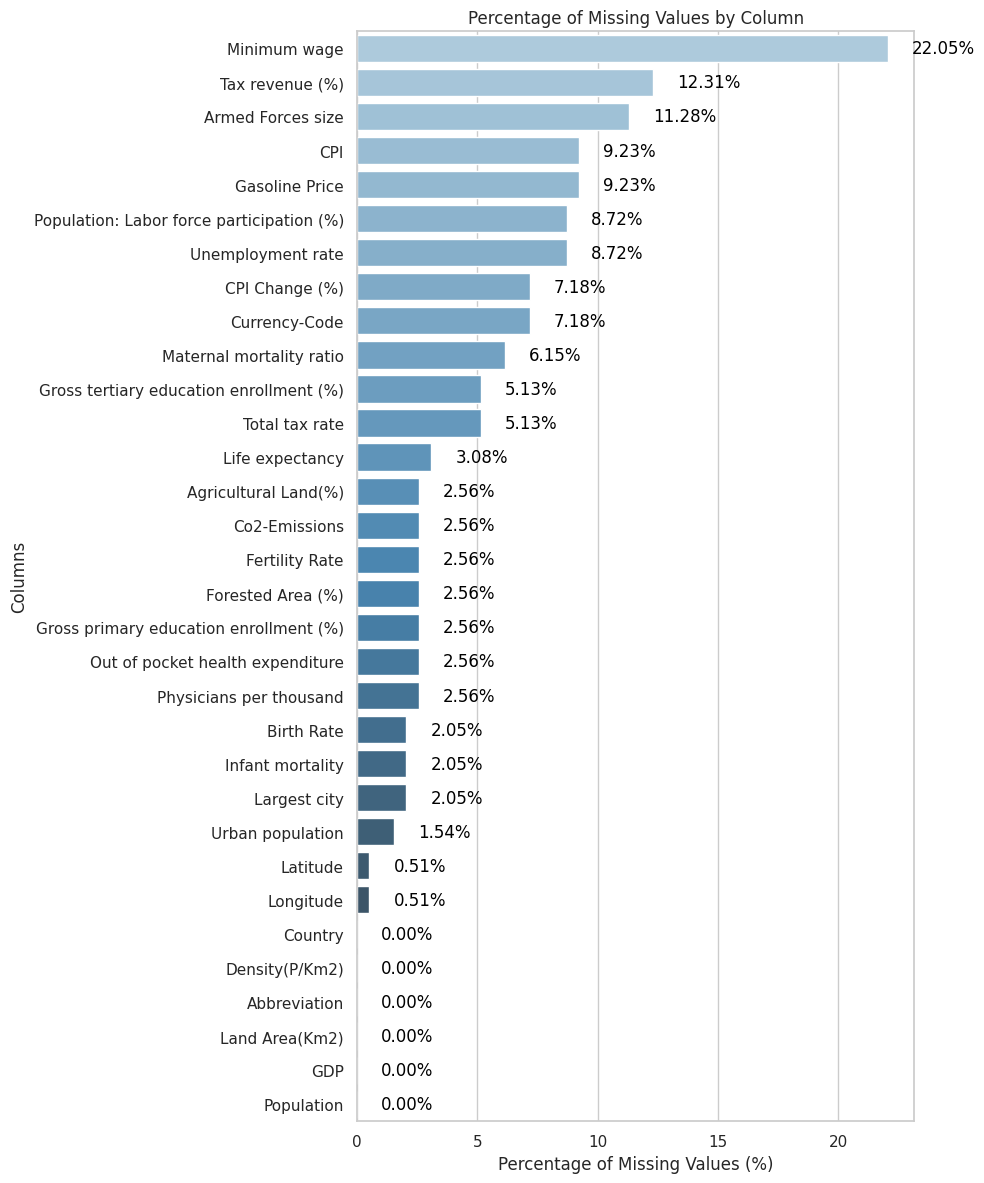

In [14]:
missing_data_summary: DataFrame = (
    cleaned_df.select(
        [
            ((pl.col(name=column).is_null().sum() / 195) * 100).alias(name=column)
            for column in cleaned_df.columns
        ]
    )
    .transpose(include_header=True)
    .sort(by="column_0", descending=True)
)

columns: list[str] = missing_data_summary["column"].to_list()
missing_percentages: list[float] = missing_data_summary["column_0"].to_list()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 12))
ax: Axes = sns.barplot(x=missing_percentages, y=columns, palette="Blues_d", hue=columns)

for p in ax.patches:
    ax.text(
        x=p.get_width() + 1,
        y=p.get_y() + p.get_height() / 2,
        s=f"{p.get_width():.2f}%",
        va="center",
        ha="left",
        color="black",
    )

plt.xlabel(xlabel="Percentage of Missing Values (%)")
plt.ylabel(ylabel="Columns")
plt.title(label="Percentage of Missing Values by Column")
plt.tight_layout()
plt.show()

As we can see, there are some columns with a considerable amount of missing values. We will try to find information to fill these missing values as far as possible.

We're going to update Forested Area (%) by using the information of `forest_area_analysis.ipynb`. For more detail on how we obtained these values you can take a look at that notebook:

In [15]:
ls_countries: list[str] = [
    "Eswatini",
    "North Macedonia",
    "South Sudan",
    "Monaco",
    "Nauru",
]
ls_values: list[float] = [29.1, 39.7, 11.3, 0.0, 0.0]

for i in range(0, len(ls_countries)):
    cleaned_df: DataFrame = cleaned_df.with_columns(
        pl.when(pl.col(name="Country") == ls_countries[i])
        .then(statement=ls_values[i])
        .otherwise(statement=pl.col(name="Forested Area (%)"))
        .alias(name="Forested Area (%)")
    )

cleaned_df.filter(pl.col(name="Country").is_in(other=ls_countries)).select(
    ["Country", "Forested Area (%)"]
)

Country,Forested Area (%)
str,f64
"""Eswatini""",29.1
"""Monaco""",0.0
"""Nauru""",0.0
"""North Macedonia""",39.7
"""South Sudan""",11.3


Now, we're going to update Life expectancy column by using Kaggle's [Global Life Expectancy dataset](https://www.kaggle.com/datasets/nafayunnoor/global-life-expectancy-data-1950-2023?select=Preprocessed_Life_Expectancy.csv)

In [16]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Life expectancy"].is_null() | cleaned_df["Life expectancy"].is_nan()
)

null_values.select(["Country", "Life expectancy"])

Country,Life expectancy
str,f64
"""Andorra""",null
"""Eswatini""",null
"""Monaco""",null
"""Nauru""",null
"""North Macedonia""",null
"""Tuvalu""",null


In [17]:
ls_countries: list[str] = [
    "Andorra",
    "Eswatini",
    "Monaco",
    "Nauru",
    "North Macedonia",
    "Tuvalu",
]
ls_values: list[float] = [84.04, 64.12, 86.37, 63.10, 77.39, 67.10]

for i in range(0, len(ls_countries)):
    cleaned_df: DataFrame = cleaned_df.with_columns(
        pl.when(pl.col(name="Country") == ls_countries[i])
        .then(statement=ls_values[i])
        .otherwise(statement=pl.col(name="Life expectancy"))
        .alias(name="Life expectancy")
    )

Filter countries where latitude or longitude is null or empty

In [18]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Latitude"].is_null()
    | cleaned_df["Latitude"].is_nan()
    | cleaned_df["Longitude"].is_null()
    | cleaned_df["Longitude"].is_nan()
)

null_values.select(["Country", "Latitude", "Longitude"])

Country,Latitude,Longitude
str,f64,f64
"""Sao Tome and Principe""",null,null


To update this column, we're going to check the values using the following website: https://www.latlong.net/place/s-o-tom-and-pr-ncipe-island-25177.html

In [19]:
cleaned_df: DataFrame = cleaned_df.with_columns(
    pl.when(pl.col(name="Country") == "Sao Tome and Principe")
    .then(statement=0.255436)
    .otherwise(statement=pl.col(name="Latitude"))
    .alias(name="Latitude")
)

cleaned_df = cleaned_df.with_columns(
    pl.when(pl.col(name="Country") == "Sao Tome and Principe")
    .then(statement=6.602781)
    .otherwise(statement=pl.col(name="Longitude"))
    .alias(name="Longitude")
)

Let's fill Co2-Emissions column:

In [20]:
null_values: DataFrame = cleaned_df.filter(
    cleaned_df["Co2-Emissions"].is_null() | cleaned_df["Co2-Emissions"].is_nan()
)

null_values.select(["Country", "Co2-Emissions"])

Country,Co2-Emissions
str,i64
"""Eswatini""",null
"""Monaco""",null
"""Nauru""",null
"""North Macedonia""",null
"""San Marino""",null


Now, we are going to display the number of missing values in each column again.

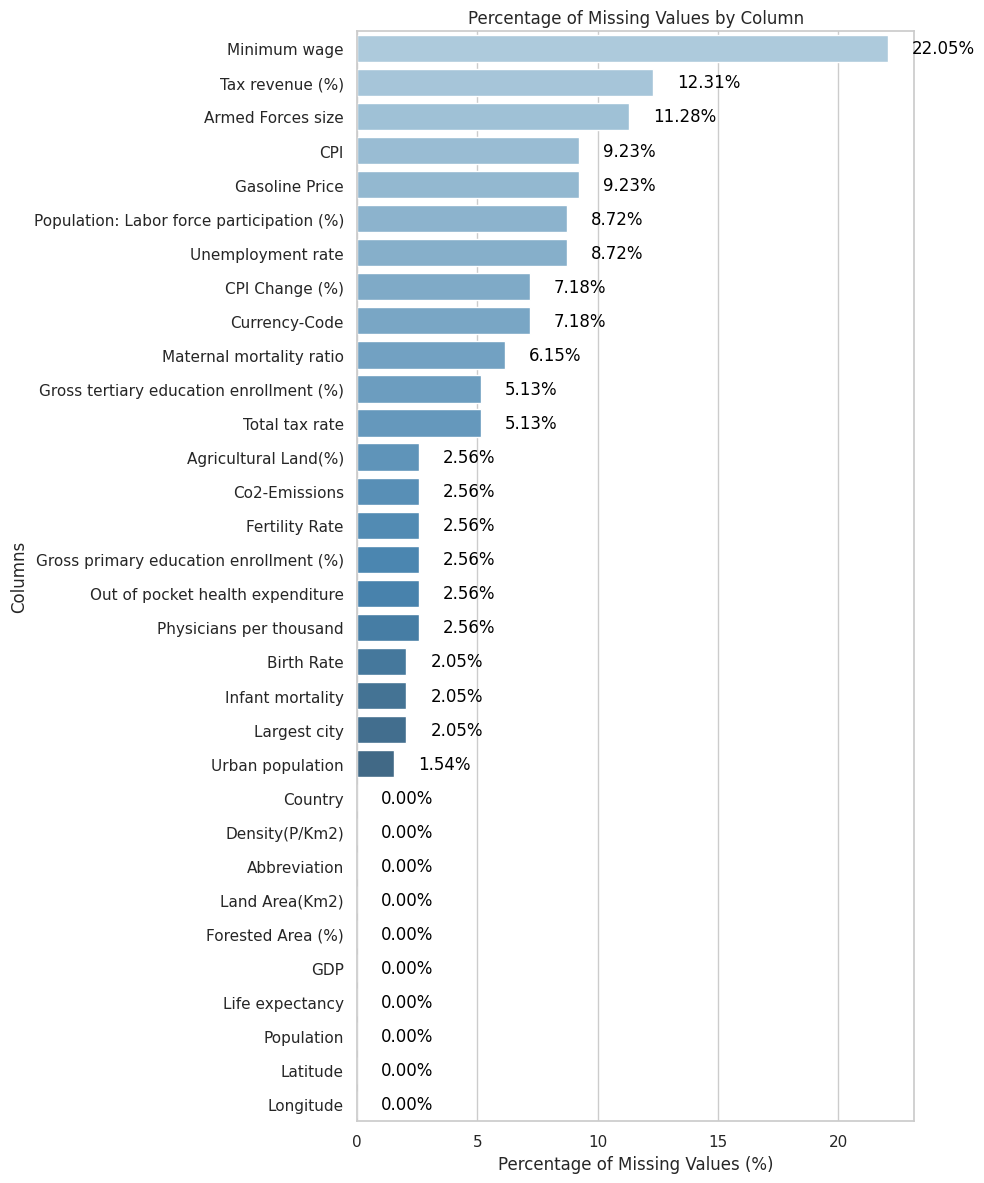

In [ ]:
from matplotlib.axes._axes import Axes
from polars.dataframe.frame import DataFrame


missing_data_summary: DataFrame = (
    cleaned_df.select(
        [
            ((pl.col(name=column).is_null().sum() / 195) * 100).alias(column)
            for column in cleaned_df.columns
        ]
    )
    .transpose(include_header=True)
    .sort(by="column_0", descending=True)
)

columns: list[str] = missing_data_summary["column"].to_list()
missing_percentages: list[str] = missing_data_summary["column_0"].to_list()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 12))
ax: Axes = sns.barplot(x=missing_percentages, y=columns, palette="Blues_d", hue=columns)

for p in ax.patches:
    ax.text(
        x=p.get_width() + 1,
        y=p.get_y() + p.get_height() / 2,
        s=f"{p.get_width():.2f}%",
        va="center",
        ha="left",
        color="black",
    )

plt.xlabel(xlabel="Percentage of Missing Values (%)")
plt.ylabel(ylabel="Columns")
plt.title(label="Percentage of Missing Values by Column")
plt.tight_layout()
plt.show()

Finally, we are going to save the processed dataset in a new file, in order to use it in the next notebooks.

In [22]:
cleaned_df.write_csv("../data/cleaned/data.csv")